# Linear Regression - Multiple

#### Submitted By: Ebin Chathoth Sleeba

## Data Set Information

Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

## Attribute Information

1.) Area (A): The area of a bean zone and the number of pixels within its boundaries.

2.) Perimeter (P): Bean circumference is defined as the length of its border.

3.) Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.

4.) Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.

5.) Aspect ratio (K): Defines the relationship between L and l.

6.) Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.

7.) Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.

8.) Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.

9.) Extent (Ex): The ratio of the pixels in the bounding box to the bean area.

10.)Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.

11.)Roundness (R): Calculated with the following formula: (4piA)/(P^2)

12.)Compactness (CO): Measures the roundness of an object: Ed/L

13.)ShapeFactor1 (SF1)

14.)ShapeFactor2 (SF2)

15.)ShapeFactor3 (SF3)

16.)ShapeFactor4 (SF4)

17.)Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)

## Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

## Import Dataset

In [2]:
#In this step we create a data frame using an excel file.
dataFrame = pd.read_excel("data/Dry_Bean_Dataset.xlsx")

## Exploratory Data Analysis And Pre-processing

##### Understanding the variables in the data set

In [3]:
dataFrame.head()
#Here the target label is class which is categorical data. We need convert 
#that in to numerical because the system can only understand numerical data.
#All other columns are numerical.

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [4]:
print("Number of Rows", len(dataFrame))
print("Number of Columns", len(dataFrame.columns))

Number of Rows 13611
Number of Columns 17


In [5]:
dataFrame.describe()
#This gives the basic details about the dataset the count,the maximum value, min value, mean value etc of each column.

Area     Perimeter  MajorAxisLength  MinorAxisLength  \
count   13611.000000  13611.000000     13611.000000     13611.000000   
mean    53048.284549    855.283459       320.141867       202.270714   
std     29324.095717    214.289696        85.694186        44.970091   
min     20420.000000    524.736000       183.601165       122.512653   
25%     36328.000000    703.523500       253.303633       175.848170   
50%     44652.000000    794.941000       296.883367       192.431733   
75%     61332.000000    977.213000       376.495012       217.031741   
max    254616.000000   1985.370000       738.860153       460.198497   

       AspectRation  Eccentricity     ConvexArea  EquivDiameter        Extent  \
count  13611.000000  13611.000000   13611.000000   13611.000000  13611.000000   
mean       1.583242      0.750895   53768.200206     253.064220      0.749733   
std        0.246678      0.092002   29774.915817      59.177120      0.049086   
min        1.024868      0.218951   20684.000000     161.243764      0.555315   
25%        1.432307      0.715928   36714.500000     215.068003      0.718634   
50%        1.551124      0.764441   45178.000000     238.438026      0.759859   
75%        1.707109      0.810466   62294.000000     279.446467      0.786851   
max        2.430306      0.911423  263261.000000     569.374358      0.866195   

           Solidity     roundness   Compactness  ShapeFactor1  ShapeFactor2  \
count  13611.000000  13611.000000  13611.000000  13611.000000  13611.000000   
mean       0.987143      0.873282      0.799864      0.006564      0.001716   
std        0.004660      0.059520      0.061713      0.001128      0.000596   
min        0.919246      0.489618      0.640577      0.002778      0.000564   
25%        0.985670      0.832096      0.762469      0.005900      0.001154   
50%        0.988283      0.883157      0.801277      0.006645      0.001694   
75%        0.990013      0.916869      0.834270      0.007271      0.002170   
max        0.994677      0.990685      0.987303      0.010451      0.003665   

       ShapeFactor3  ShapeFactor4  
count  13611.000000  13611.000000  
mean       0.643590      0.995063  
std        0.098996      0.004366  
min        0.410339      0.947687  
25%        0.581359      0.993703  
50%        0.642044      0.996386  
75%        0.696006      0.997883  
max        0.974767      0.999733

###### Handling duplicate values

In [6]:
print(f"The given dataset has {dataFrame.duplicated().sum()} duplicate values")

The given dataset has 68 duplicate values


In [7]:
if(dataFrame.duplicated().sum() > 0):
    #Using drop_duplicates we can remove these values so that our model will be more accurate.
    dataFrame.drop_duplicates(inplace=True)
    print(f"Duplicate: {dataFrame.duplicated().sum()}")

Duplicate: 0


In [8]:
dataFrame.duplicated().sum()
#Now the duplicate values are 0.

0

###### Handling the missing values

In [9]:
dataFrame.isnull().sum()
#dataFrame.fillna(meanvalue of column)
#There are no empty columns in this dataset

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [10]:
dataFrame.info()
#The below dataframe contains a categorical data which needs to be converted.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13543 non-null  int64  
 1   Perimeter        13543 non-null  float64
 2   MajorAxisLength  13543 non-null  float64
 3   MinorAxisLength  13543 non-null  float64
 4   AspectRation     13543 non-null  float64
 5   Eccentricity     13543 non-null  float64
 6   ConvexArea       13543 non-null  int64  
 7   EquivDiameter    13543 non-null  float64
 8   Extent           13543 non-null  float64
 9   Solidity         13543 non-null  float64
 10  roundness        13543 non-null  float64
 11  Compactness      13543 non-null  float64
 12  ShapeFactor1     13543 non-null  float64
 13  ShapeFactor2     13543 non-null  float64
 14  ShapeFactor3     13543 non-null  float64
 15  ShapeFactor4     13543 non-null  float64
 16  Class            13543 non-null  object 
dtypes: float64(1

In [25]:
dataFrame['Class'].unique()
#Below are the unique values of the target labels.

['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON']
Categories (7, object): ['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

###### One hot Encoding

In [26]:
#Here we are replacing the catogorical data as numerical values
dataFrame.Class = pd.Categorical(dataFrame.Class)
dataFrame['Class_Code'] = dataFrame.Class.cat.codes

In [27]:
dataFrame.info()
#The Additional column Class_Code is added with numerical data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13543 entries, 0 to 13610
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Area             13543 non-null  int64   
 1   Perimeter        13543 non-null  float64 
 2   MajorAxisLength  13543 non-null  float64 
 3   MinorAxisLength  13543 non-null  float64 
 4   AspectRation     13543 non-null  float64 
 5   Eccentricity     13543 non-null  float64 
 6   ConvexArea       13543 non-null  int64   
 7   EquivDiameter    13543 non-null  float64 
 8   Extent           13543 non-null  float64 
 9   Solidity         13543 non-null  float64 
 10  roundness        13543 non-null  float64 
 11  Compactness      13543 non-null  float64 
 12  ShapeFactor1     13543 non-null  float64 
 13  ShapeFactor2     13543 non-null  float64 
 14  ShapeFactor3     13543 non-null  float64 
 15  ShapeFactor4     13543 non-null  float64 
 16  Class            13543 non-null  categor

In [32]:
#Removing the duplicate column
dataFrame.drop(['Class'],axis=1,inplace=True)

KeyError: "['Class'] not found in axis"

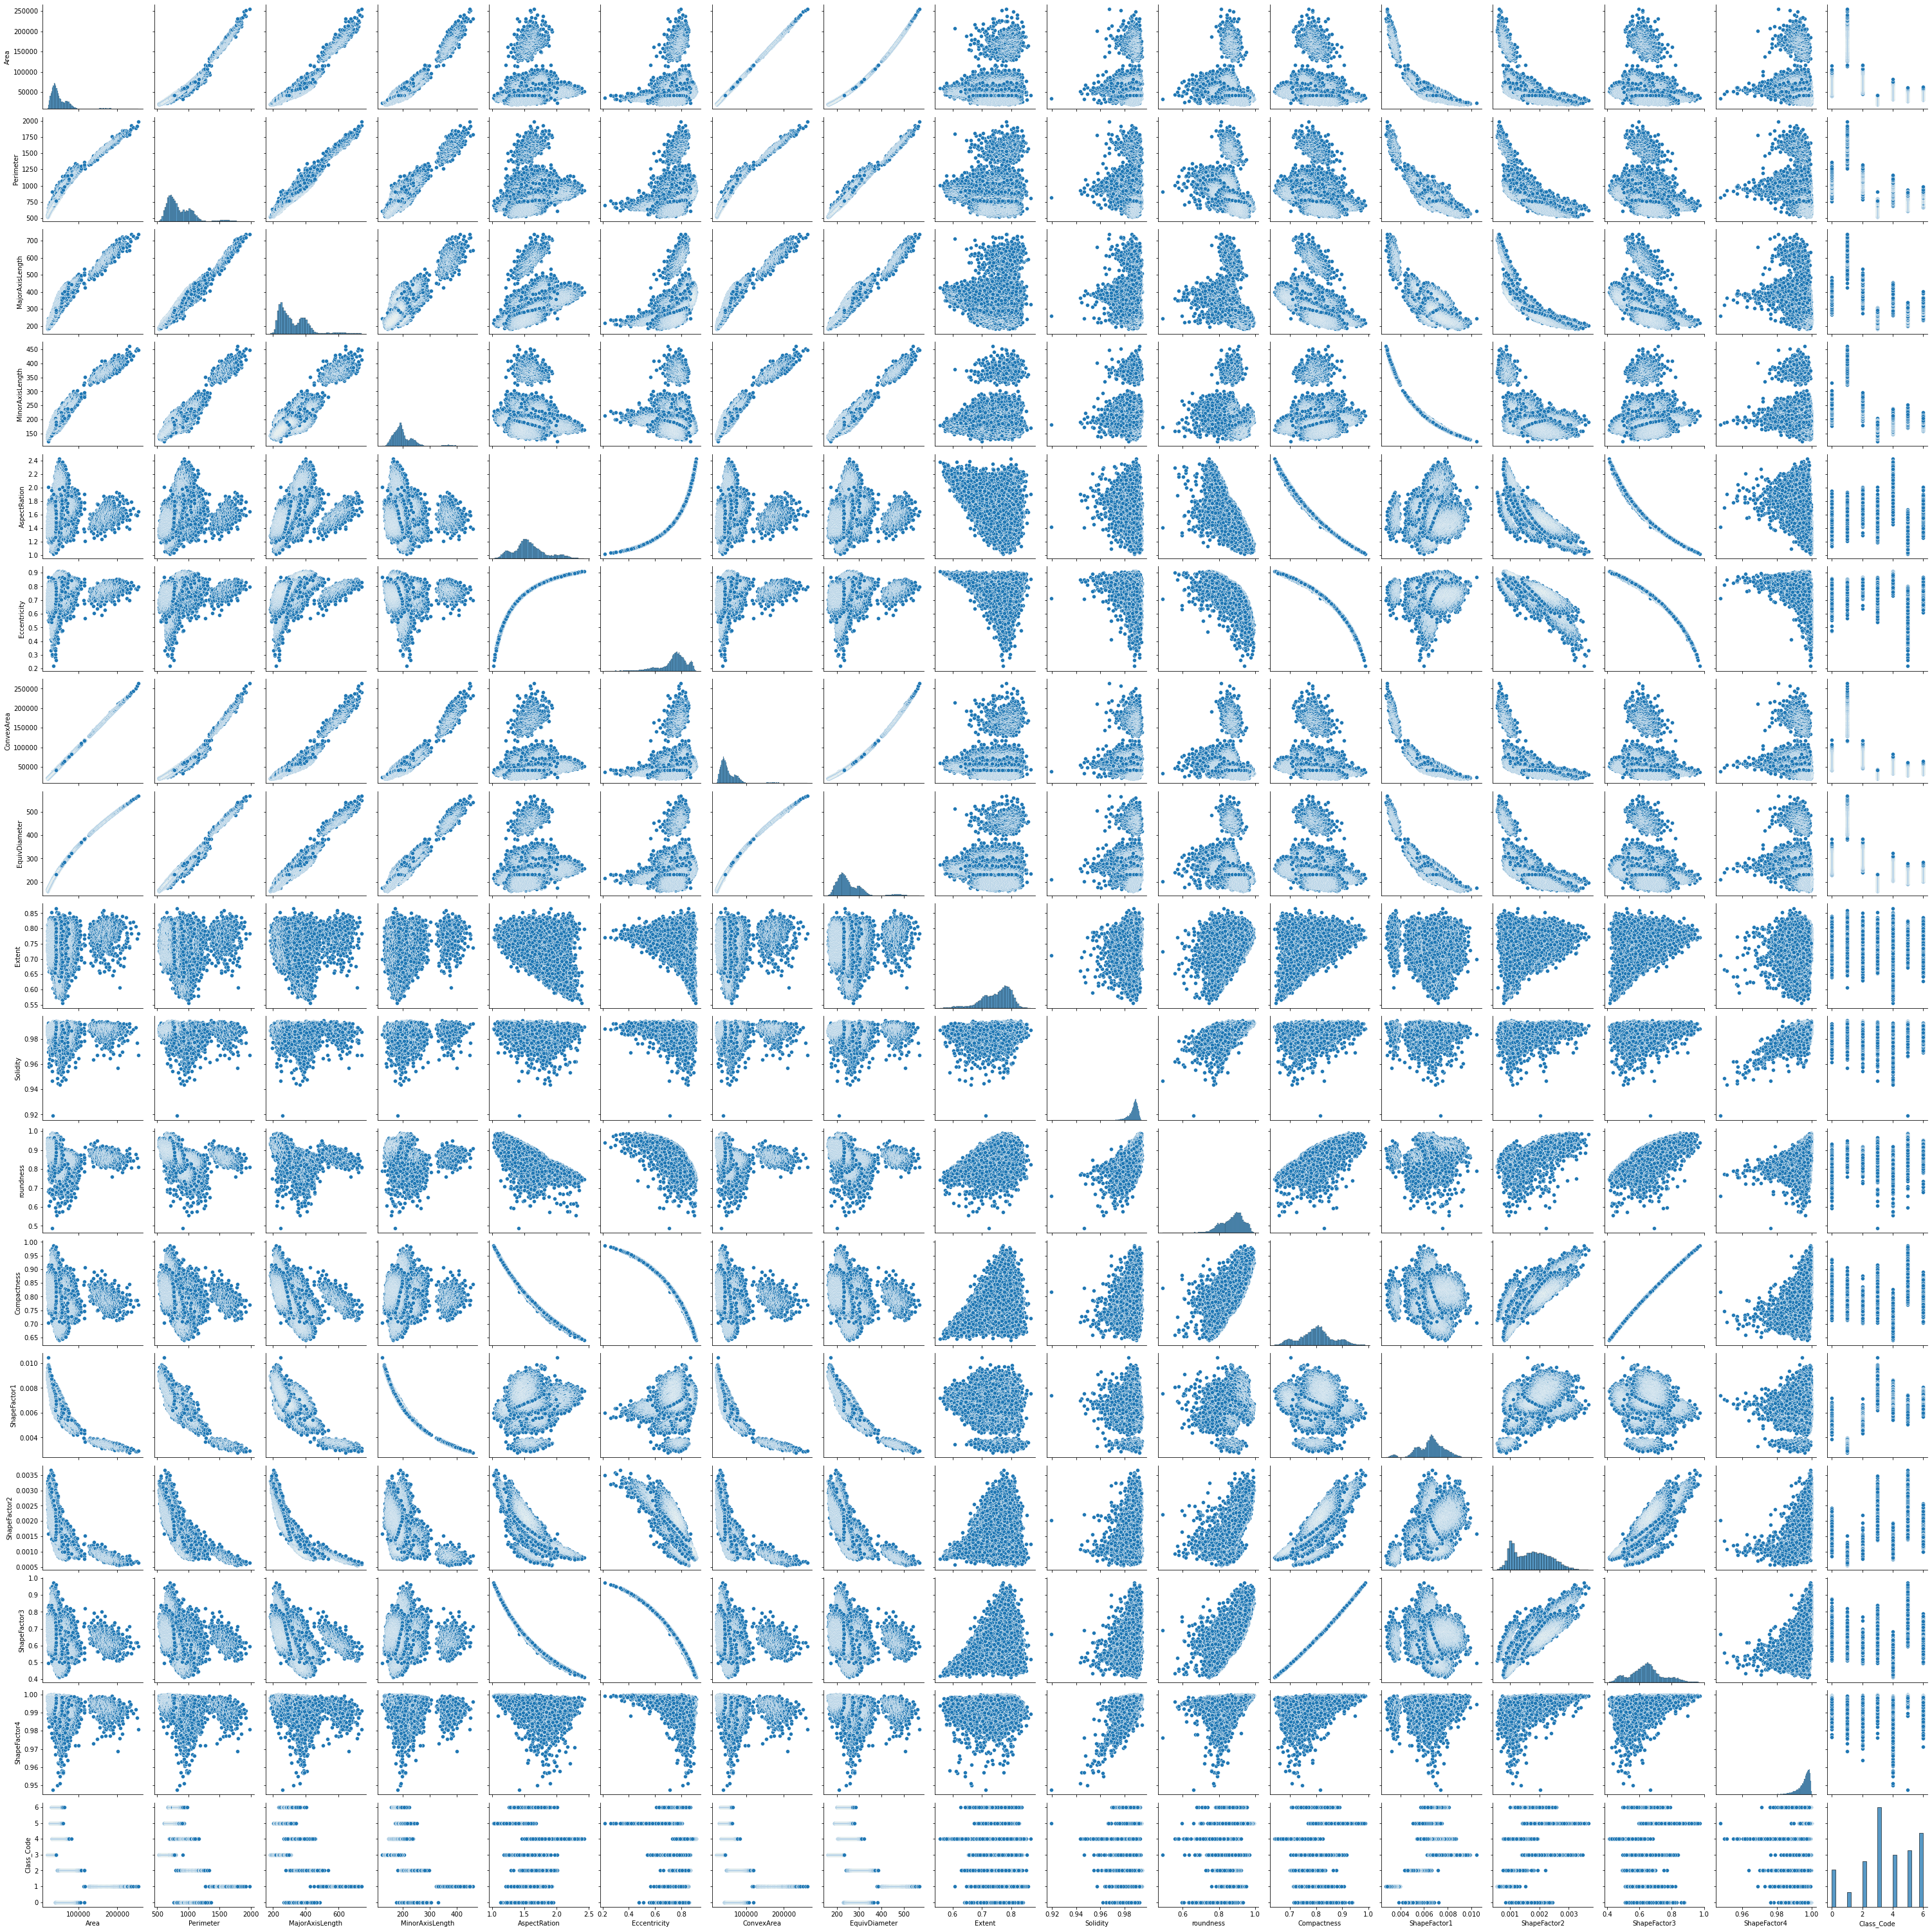

In [33]:
#Dataframe correlation
sns.pairplot(dataFrame)

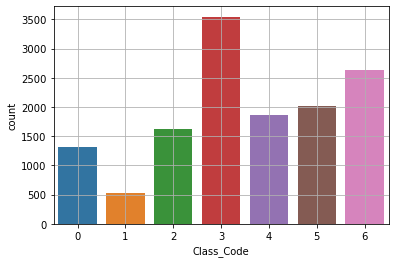

In [34]:
#The count of target label against other variables
sns.countplot(dataFrame['Class_Code'])
plt.grid(True)

In [86]:
X = dataFrame.drop('Class_Code', axis=1)
y = dataFrame[['Class_Code']]

In [87]:
#Function train_test_split used for spliting the training and test data set.
#Here the parameter test_size defines how much data are we going to use for testing and training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#The test_size = 0.25 means we are going to train the model using 75% of the data 
#and after building the model by using the remaining 25% we will test this.
#Am giving random_state as zero so that I get same result all the time.

In [46]:
print('X_train_shape :',X_train.shape ,'\n y_train_shape :',y_train.shape)

X_train_shape : (10157, 16) 
 y_train_shape : (10157, 1)


In [47]:
print('X_test_shape :',X_test.shape ,'\n y_test_shape :',y_test.shape)

X_test_shape : (3386, 16) 
 y_test_shape : (3386, 1)


## Create Model

In [48]:
entropy_model = DecisionTreeClassifier(max_depth=10)
entropy_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

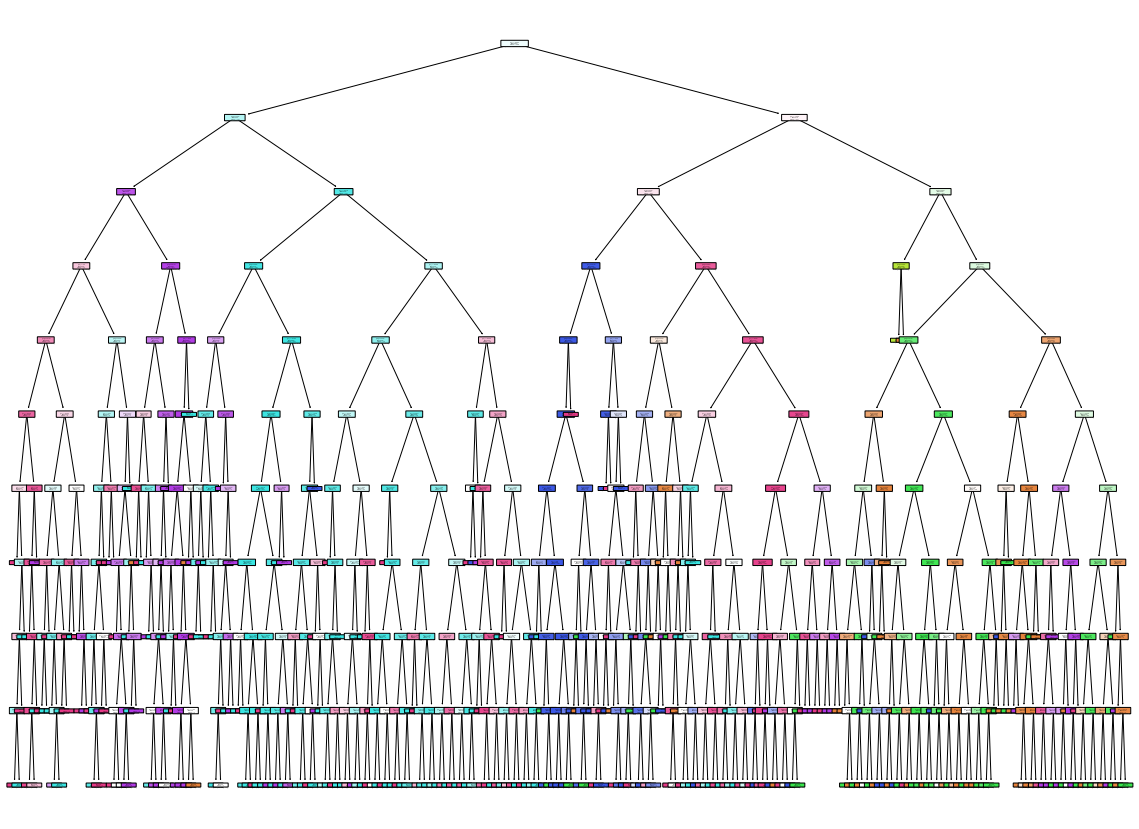

In [51]:
# Plotting Decision Tree
plt.figure(figsize=(20,15))
tree.plot_tree(entropy_model, filled=True, rounded=True)
plt.show()

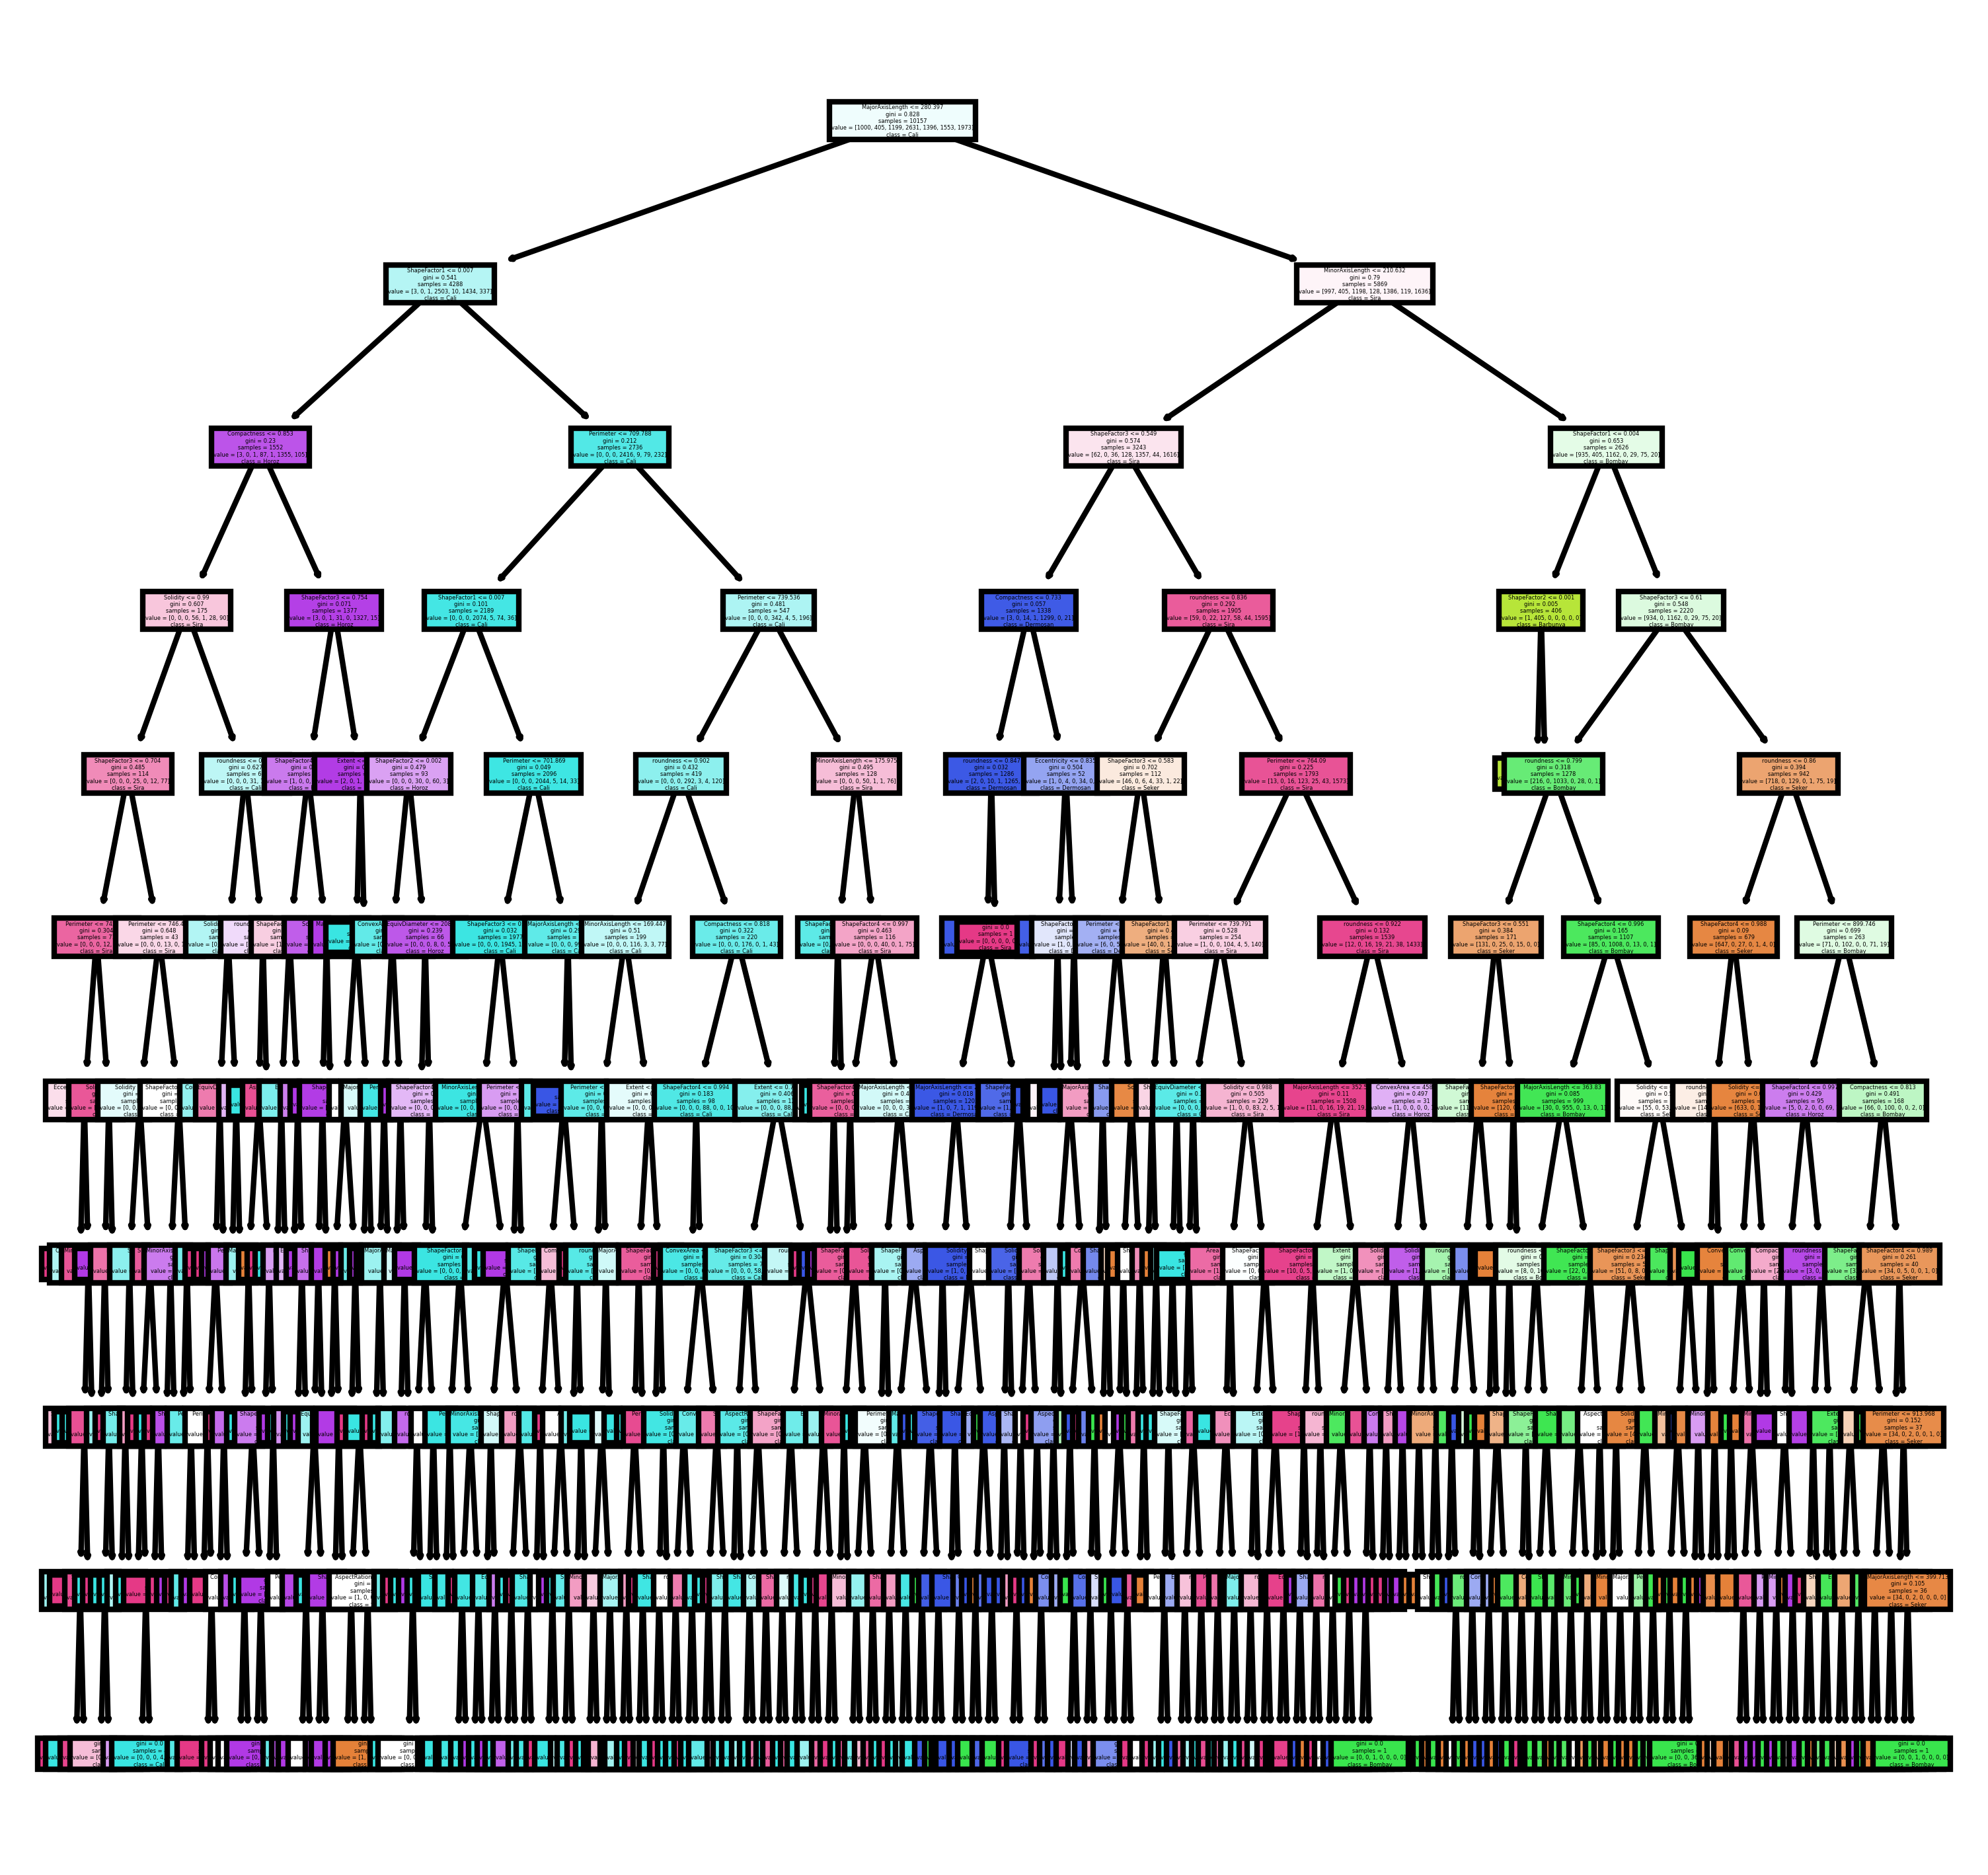

In [50]:
features = X.columns.to_list()
cls_nme = ['Seker', 'Barbunya', 'Bombay', 'Cali', 'Dermosan', 'Horoz', 'Sira']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6), dpi=600)
tree.plot_tree(entropy_model, feature_names=features, class_names=cls_nme, filled=True)
plt.show()

In [52]:
#prediction of train data
y_train_hat = entropy_model.predict(X_train)

In [53]:
#prediction of test data
y_test_hat = entropy_model.predict(X_test)

In [54]:
y_test_hat

array([3, 6, 2, ..., 3, 5, 3], dtype=int8)

In [56]:
pd.Series(y_test_hat).value_counts()

3    896
6    700
5    486
4    452
2    415
0    322
1    115
dtype: int64

In [57]:
# The builetd model has 90% accuracy which is very good. 
#Here the accuracy score is based on test value of y vs predicted value of y
accuracy_score(y_test,y_test_hat)

0.9040165386887182

In [60]:
#Confusion matrix is used to check the accuracy of a classification algorithm
#Though there is some error in the value most of them are cateforised. Showing good result
confusion_matrix(y_test,y_test_hat)

array([[290,   0,  10,   0,   3,   7,  12],
       [  2, 115,   0,   0,   0,   0,   0],
       [ 19,   0, 393,   0,   9,   4,   6],
       [  0,   0,   0, 818,   3,  20,  74],
       [  8,   0,  10,   7, 426,   0,  13],
       [  1,   0,   1,   4,   0, 446,  22],
       [  2,   0,   1,  67,  11,   9, 573]], dtype=int64)

In [61]:
# Checking accuracy of model for train data. Here we are printing the accuracy score of trained y data vs predicted data.
accuracy_score(y_train,y_train_hat)

#The training set has 96% accuracy

0.9687899970463719

In [63]:
#The confusion matrix show good accuracy
confusion_matrix(y_train,y_train_hat)

array([[ 963,    0,   21,    0,    2,    0,   14],
       [   0,  405,    0,    0,    0,    0,    0],
       [  20,    0, 1168,    0,    5,    1,    5],
       [   0,    0,    0, 2548,    0,    8,   75],
       [   1,    0,   10,    7, 1364,    0,   14],
       [   1,    0,    0,   16,    0, 1519,   17],
       [   0,    0,    0,   87,    7,    6, 1873]], dtype=int64)

## Entropy Criterion Model

In [64]:
#Creating model using entropy
entropy_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
entropy_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

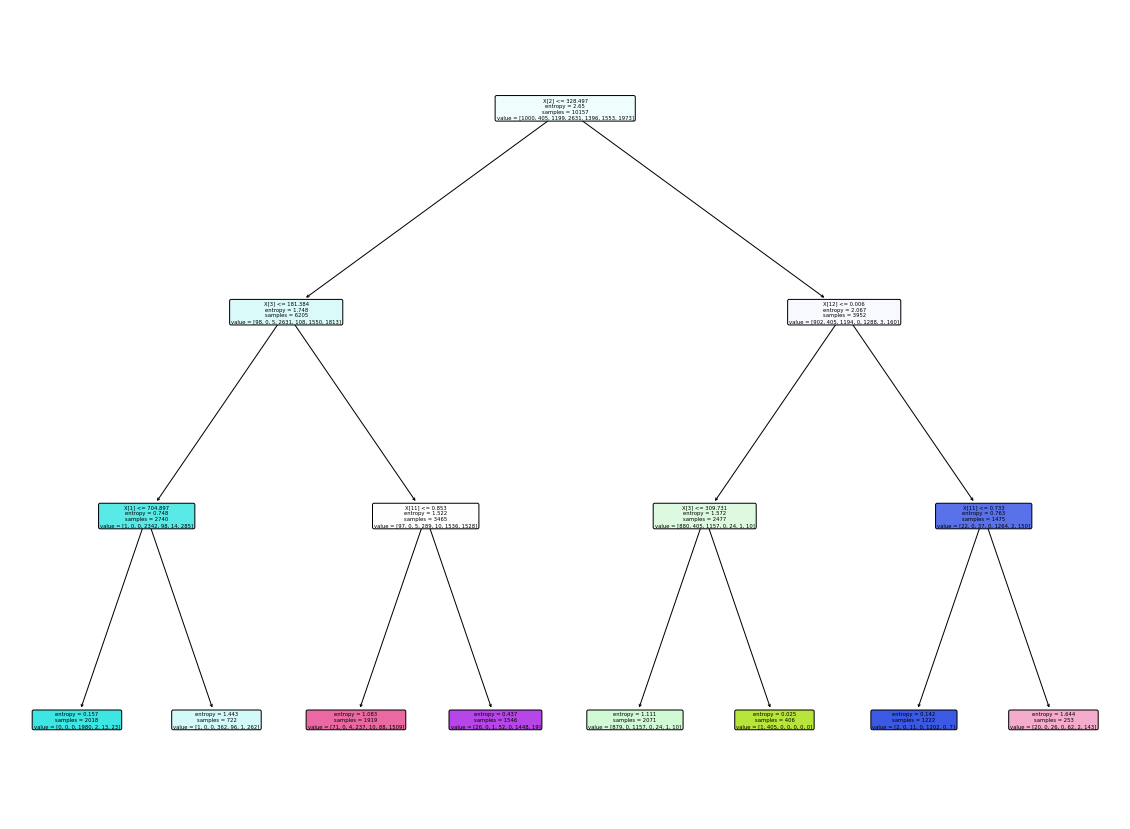

In [65]:
# Plotting Decision Tree
plt.figure(figsize=(20,15))
tree.plot_tree(entropy_model, filled=True, rounded=True)
plt.show()

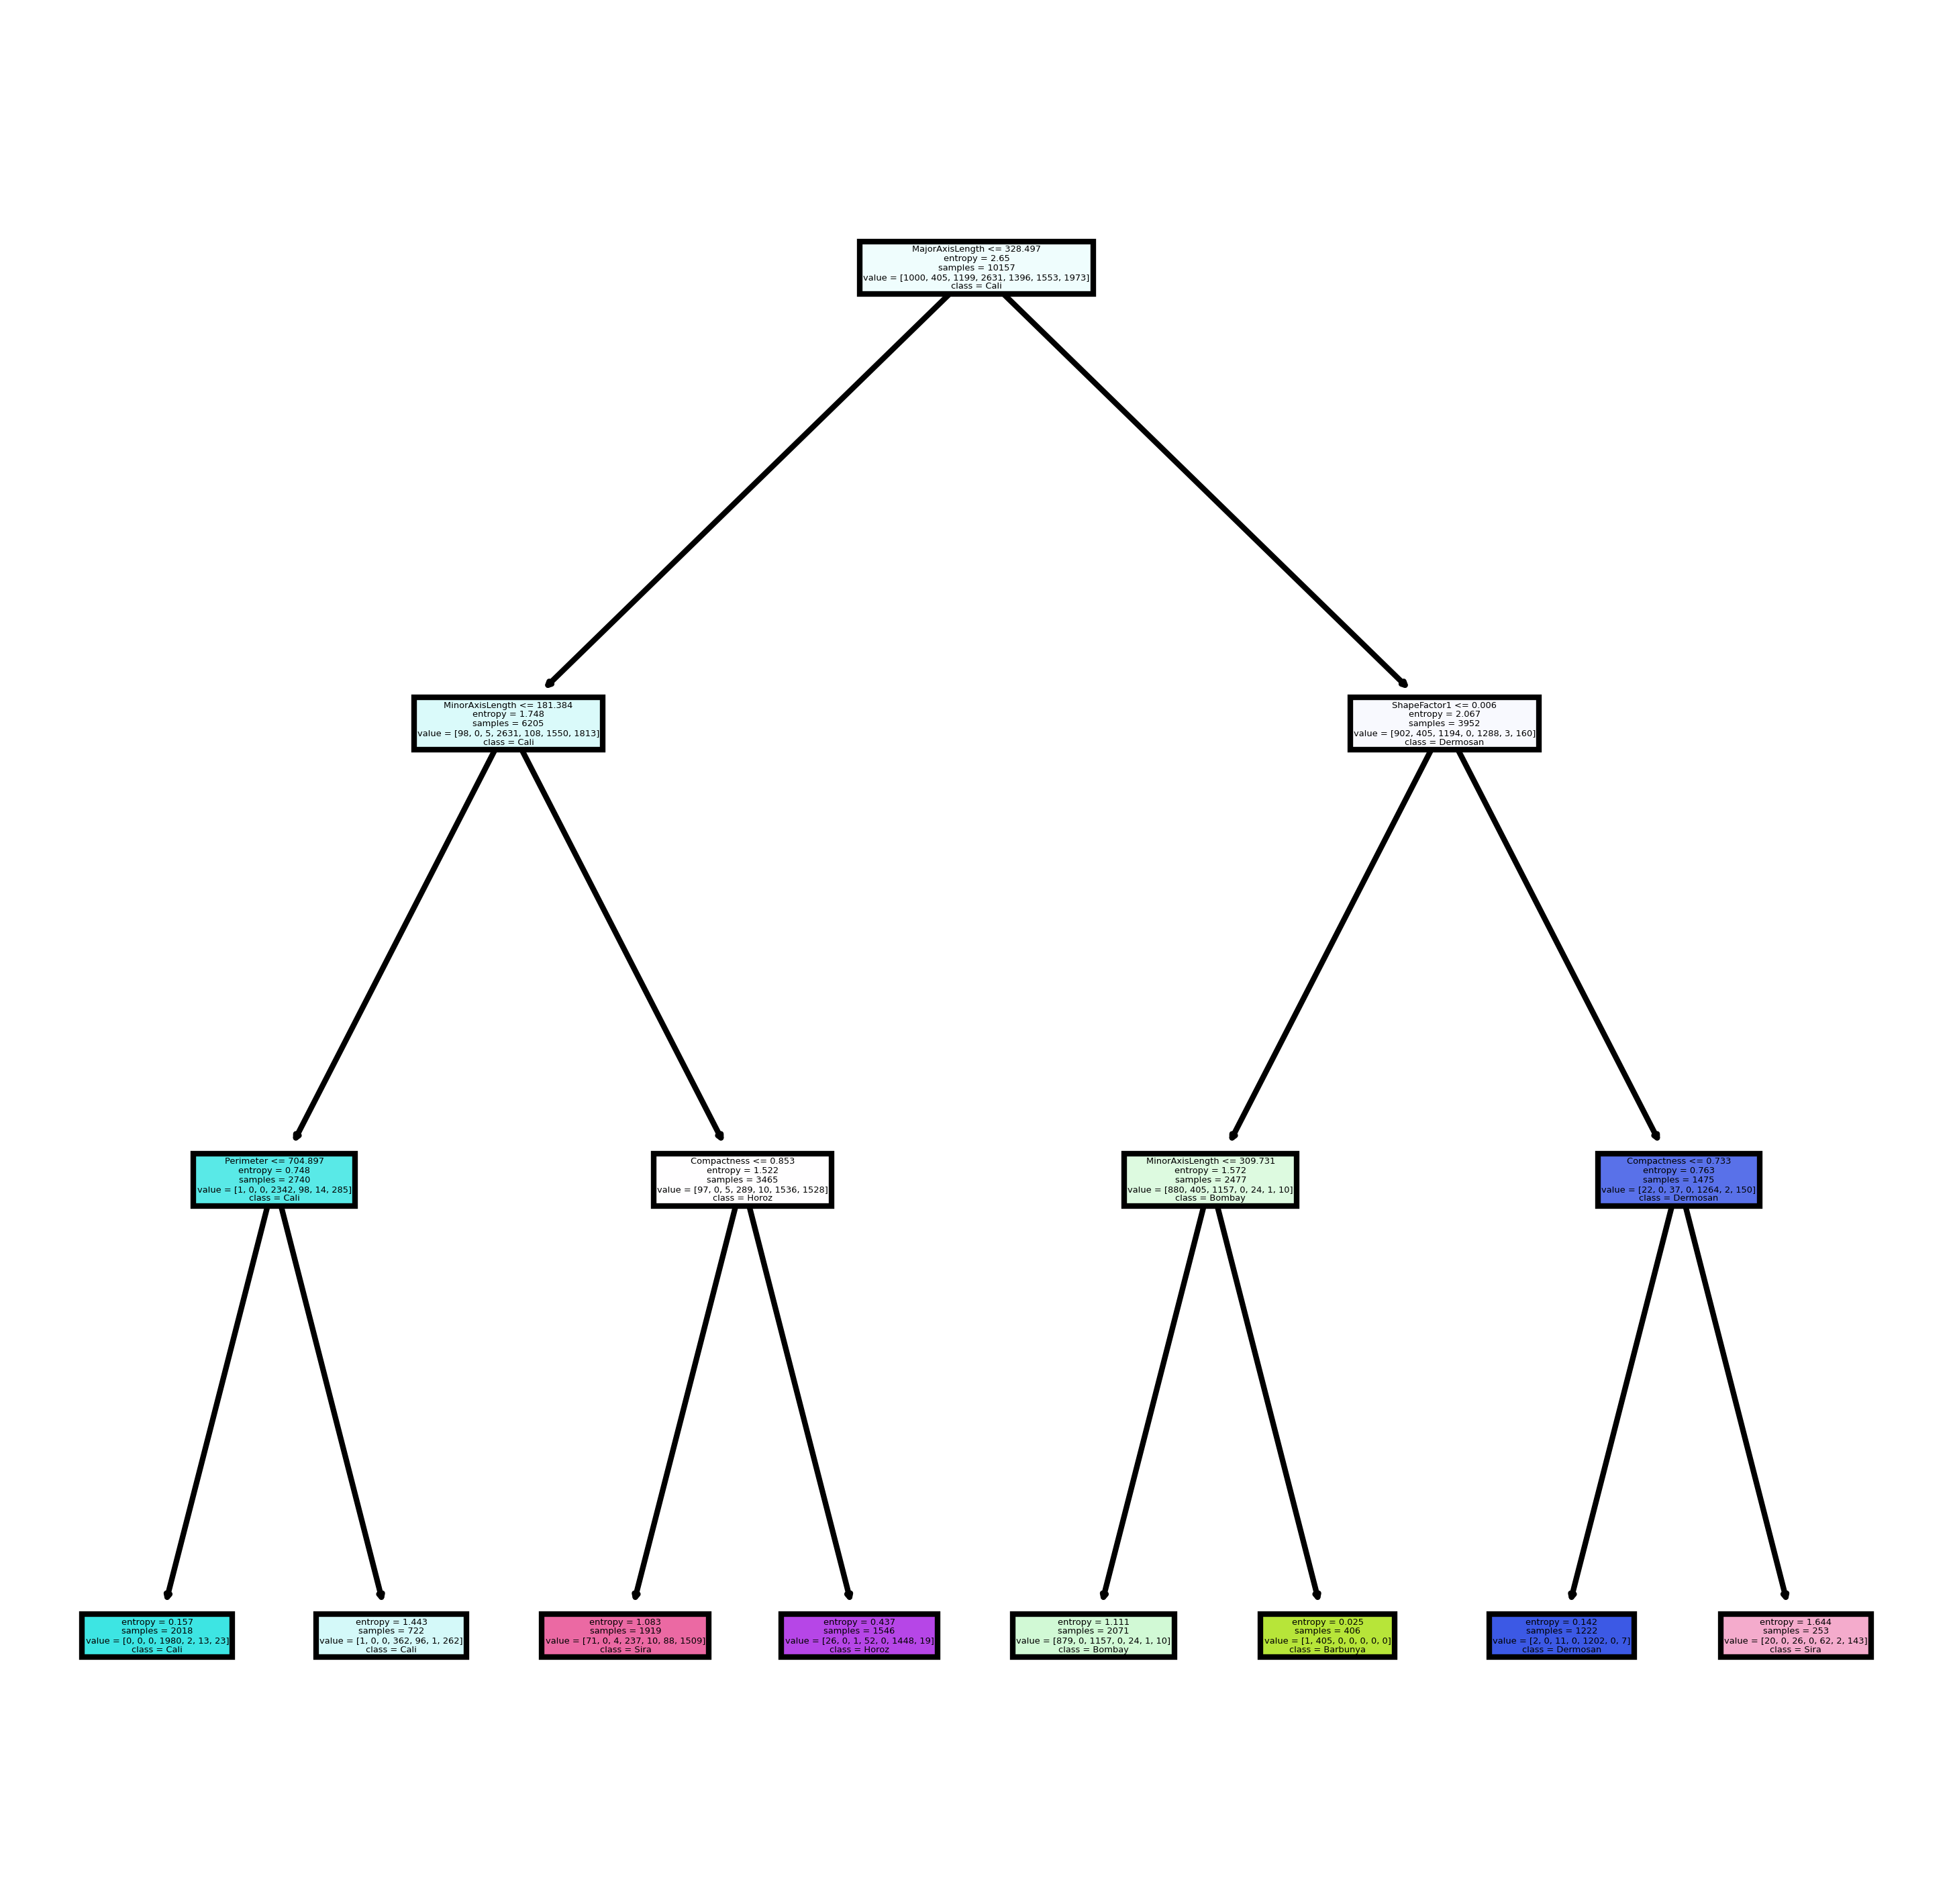

In [66]:
features = X.columns.to_list()
cls_nme = ['Seker', 'Barbunya', 'Bombay', 'Cali', 'Dermosan', 'Horoz', 'Sira']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6), dpi=600)
tree.plot_tree(entropy_model, feature_names=features, class_names=cls_nme, filled=True)
plt.show()

In [67]:
#prediction of test data
y_test_hat = entropy_model.predict(X_test)

In [68]:
#prediction of train data
y_train_hat = entropy_model.predict(X_train)

In [69]:
y_test_hat

array([3, 6, 2, ..., 3, 5, 6], dtype=int8)

In [71]:
#Confusion matrix is used to check the accuracy of a classification algorithm
#Though there is some error in the value most of them are cateforised. Showing good result
confusion_matrix(y_test,y_test_hat)

array([[  0,   0, 277,   0,   1,  12,  32],
       [  0, 117,   0,   0,   0,   0,   0],
       [  0,   0, 417,   0,   4,   1,   9],
       [  0,   0,   0, 809,   0,  24,  82],
       [  0,   0,  12,  36, 389,   0,  27],
       [  0,   0,   1,   3,   0, 438,  32],
       [  0,   0,   1, 100,   2,   6, 554]], dtype=int64)

In [72]:
# Checking accuracy of model for train data. Here we are printing the accuracy score of trained y data vs predicted data.
accuracy_score(y_train,y_train_hat)

#The training set has 80% accuracy, which is less than the previous model

0.8079157231465984

In [73]:
#The confusion matrix show good accuracy
confusion_matrix(y_train,y_train_hat)

array([[   0,    1,  879,    1,    2,   26,   91],
       [   0,  405,    0,    0,    0,    0,    0],
       [   0,    0, 1157,    0,   11,    1,   30],
       [   0,    0,    0, 2342,    0,   52,  237],
       [   0,    0,   24,   98, 1202,    0,   72],
       [   0,    0,    1,   14,    0, 1448,   90],
       [   0,    0,   10,  285,    7,   19, 1652]], dtype=int64)

# --------------------------------------------KNN---------------------------------------------------------

In [82]:
#Importing the libraries for KNN
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

In [85]:
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbours = range(1, 9)
#neighbours=2
for k in neighbours:
 # build the model
 clf = neighbors.KNeighborsClassifier(n_neighbors=k)
 clf.fit(X_train, y_train)
 # record training set accuracy
 training_accuracy.append(clf.score(X_train, y_train))
 # record generalization accuracy
 print(k)
 print(clf.score(X_test, y_test))
 test_accuracy.append(clf.score(X_test, y_test))

1
0.722386296515062
2
0.6972829297105729
3
0.7203189604252805
4
0.7141169521559362
5
0.7212049616066155
6
0.715888954518606
7
0.7170702894270525
8
0.7164796219728293


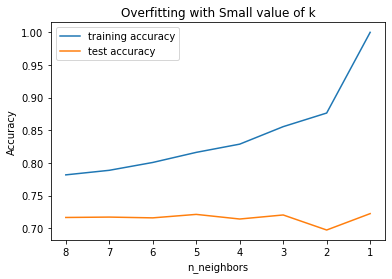

In [76]:
plt.plot(neighbours, training_accuracy, label="training accuracy")
plt.plot(neighbours, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.title('Overfitting with Small value of k')
ax = plt.gca()
ax.invert_xaxis()
plt.savefig('overfitting.png')
#Based on the value the accuracy is high when the k value is 3

In [ ]:
#Comparing Decision tree with KNN classifier. The decision tree gives more accurate result compared with KNN.
#When it comes to Supervised learning dDecision tree is the best calssification algorithm.